# Conditionals 2

## Readings

- Parts of Chapter 5 of Think Python
- Chapter 4.6 to end (skip 4.7) of Python for Everybody

## Learning Objectives

- Read and write nested conditional statements
- Define, state reasons for, and provide examples of refactoring
- Refactor code containing conditional statements into boolean expressions

### Warmup

What's wrong with this code? 

In [1]:
team = "Badgers"

# if team == "Gophers" or "Hawkeyes" or "Spartans":  # code with bug
if team == "Gophers" or team == "Hawkeyes" or team == "Spartans": 
    # fix: problem == has higher precedence than "or"
    # conditions should always be written with expansions
    print("Ahh no badgers!")
else:
    print("Yay, go badgers!")

Yay, go badgers!


**Find a partner to do these TODOs**

TODO: try to compute the boolean expression yourself, by inserting a new cell below. Change team variable's value to all three possible values.

TODO: fix the expression after your experiments

In [2]:
team = "Badgers"
print(team == "Gophers" or "Hawkeyes" or "Spartans")

Hawkeyes


In [3]:
team = "Gophers"
print(team == "Gophers" or "Hawkeyes" or "Spartans")

True


## Example 1: Classifying Children by Age
- Chained conditionals:
    - multiple branch within the same conditional
        - connected conditions
    - if conditional branch
    - elif subjective conditional branch(es)
        - elif conditions are subjective to the if condition
        - that is, only when if condition evaluates to `False`, the next elif condition is evaluated
        - only when the first elif condition evaluates to `False`, the second elif condition is evaluated
        - and so on ...
    - else alternate branch

Age classification:
- "baby" 0 to 1
- "toddler" 2 to 3
- "kid" 4 to 10
- "tween" 11 to 12
- "teen" 13 to 17
- "adult" 18+ (alternate execution)

In [4]:
age = int(input("Enter your age: ")) 

def categorize_age(age):
    if 0 <= age <= 1:
        return "infant"
    elif 2 <= age <= 3:
        return "toddler"
    elif 4 <= age <= 10:
        return "kid"
    elif 11 <= age <= 12:
        return "tween"
    elif 13 <= age <= 17:
        return "teen"
    else:
        return "adult"
    
print("You are a:", categorize_age(age))

Enter your age: 10
You are a: kid


## Example 2: Date Printer
- converts 2/14/2022 to "Feb 14th of ‘22"
- decompose a big problem into appropriate steps, by writing functions for individual components

In [5]:
def format_month(month):
    """Convert a month (as an integer) into a string. 
    1 is Jan, 2 is Feb, etc."""
    if month == 1:
        return "Jan"
    elif month == 2:
        return "Feb"
    elif month == 3:
        return "Mar"
    elif month == 4:
        return "Apr"
    elif month == 5:
        return "May"
    elif month == 6:
        return "Jun"
    elif month == 7:
        return "Jul"
    elif month == 8:
        return "Aug"
    elif month == 9:
        return "Sep"
    elif month == 10:
        return "Oct"
    elif month == 11:
        return "Nov"
    elif month == 12:
        return "Dec"
    else:
        return "Invalid month!"

In [6]:
def format_day(day):
    """Covert a day into a date string with proper ending. 
    16 --> '16th',    23 --> '23rd', """
    suffix = ""
    if day < 1:
        suffix = "error"
    elif 11 <= day % 100 <= 20:
        suffix = str(day) + "th"
    elif day % 10 == 1:
        suffix = str(day) + "st"
    elif day % 10 == 2:
        suffix = str(day) + "nd"
    elif day % 10 == 3:
        suffix = str(day) + "rd"
    else:
        suffix = str(day) + "th"
        
    return suffix

print(format_day(1))
print(format_day(2))
print(format_day(3))
print(format_day(11))
print(format_day(21))
print(format_day(111))
print(format_day(-1))

1st
2nd
3rd
11th
21st
111th
error


In [7]:
def format_date(month, day, year):
    """returns a string representing the date, such as Feb 11th of ‘22"""
    result_str = ""
    result_str += format_month(month)
    result_str += " " + format_day(day)
    result_str += " of '" + str(year % 100)
    
    return result_str

In [8]:
format_date(9, 26, 2022)

"Sep 26th of '22"

## Example 3: Stoplight

<div>
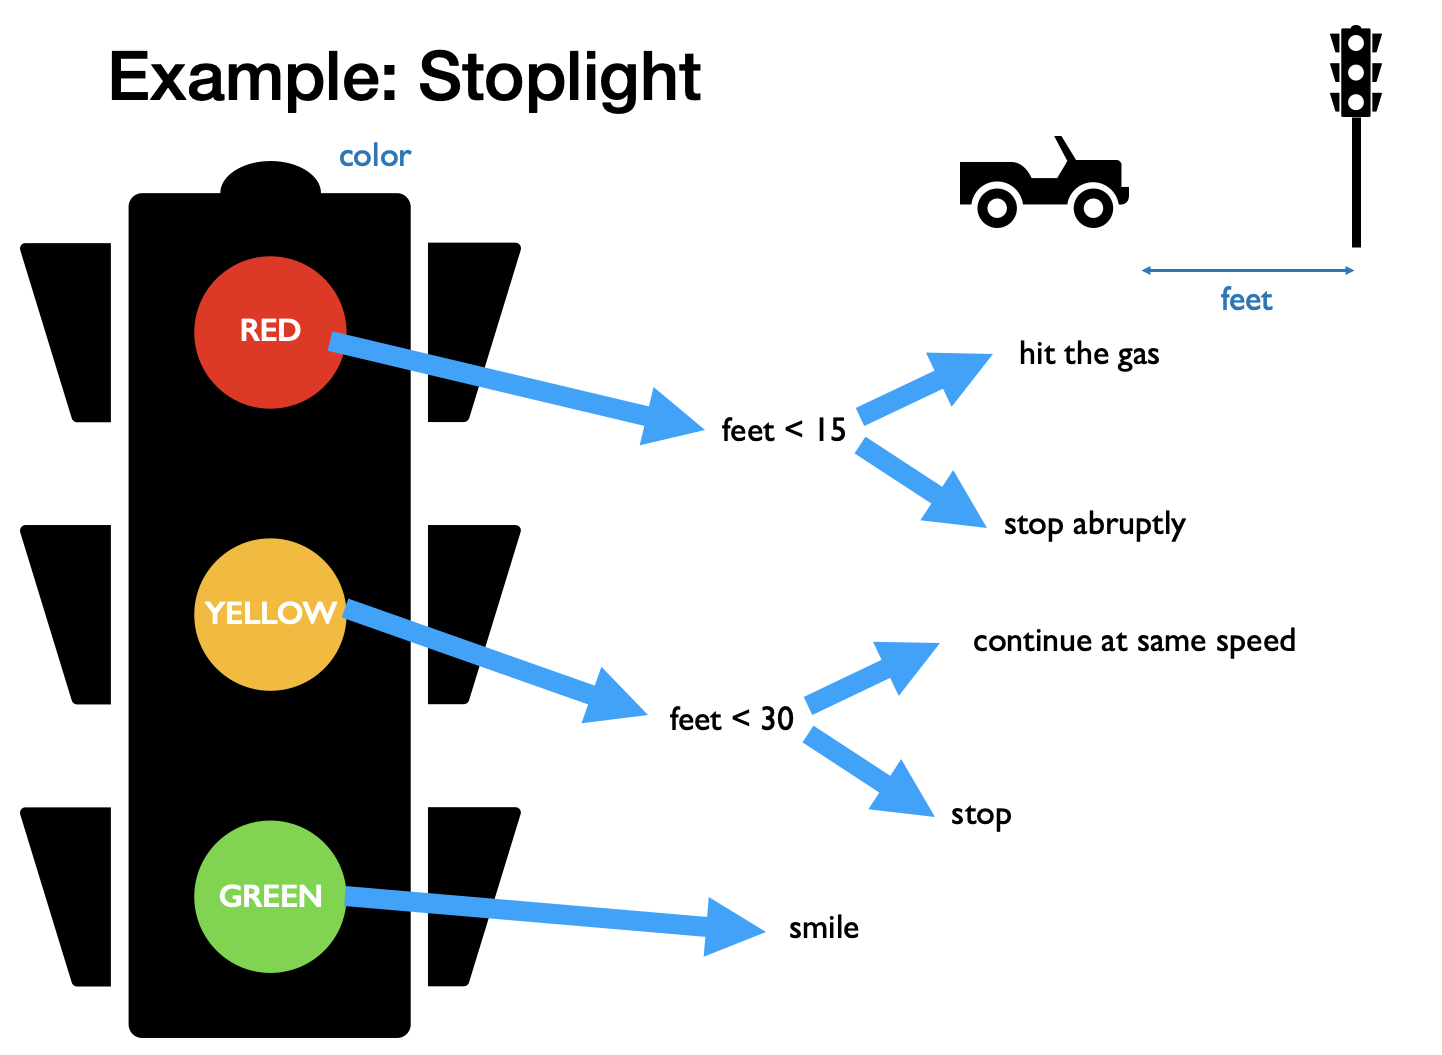
</div>

In [9]:
def stop_light(color, distance):
    if color == 'red':
        if distance < 15:
            return "hit the gas"
        else:
            return "stop abruptly"
    elif color == 'yellow':
        if distance < 30:
            return "continue at same speed"
        else:
            return "stop"
    elif color == "green":
        return "smile :)"
    else:
        return "Invalid color!"

## Refactoring

What is it? 
- Improving/rewriting parts of a program without changing its behavior.
- Like a re-wording of a recipe without changing it

Why do it?
- Make it easier to read and understand the code & what it's doing
- Sometimes to make code run faster

Principles of good refactoring:
- Don't change the program's behavior!
- The program should end up more readable than it started
- Use knowledge of if/else, and/or/not, ==, !=, etc.

### Refactoring example 1: nested if conditions

In [10]:
# check combination of a lock
def check_combination(a, b, c):
    if a == 2:
        if b == 2:
            if c == 0:
                return True
            else:
                return False
        else:
            return False
    else:
        return False
    
print(check_combination(2, 2, 0))
print(check_combination(2, 1, 0))
print(check_combination(1, 2, 0))
print(check_combination(3, 1, 9))

True
False
False
False


In [11]:
def bad_combo(a, b, c):
    return a == 2 or b == 2 or c == 0

print(bad_combo(2, 2, 0))
print(bad_combo(2, 1, 0))
print(bad_combo(1, 2, 0))
print(bad_combo(3, 1, 9))

True
True
True
False


In [12]:
def refactor_combo(a, b, c):
    return a == 2 and b == 2 and c == 0

print(refactor_combo(2, 2, 0))
print(refactor_combo(2, 1, 0))
print(refactor_combo(1, 2, 0))
print(refactor_combo(3, 1, 9))

True
False
False
False


### Refactoring example 2: cluttered conditional

In [13]:
def check_different(b1, b2):
    if b1 == True and b2 == False:
        return True
    elif b1 == False and b2 == True:
        return True
    elif b1 == True and b2 == True:
        return False
    elif b1 == False and b2 == False:
        return False
    
print(check_different(True, False))
print(check_different(False, False))
print(check_different(False, True))
print(check_different(True, True))

True
False
True
False


In [14]:
def refactor_check_different(b1, b2):
    return b1 != b2

print(refactor_check_different(True, False))
print(refactor_check_different(False, False))
print(refactor_check_different(False, True))
print(refactor_check_different(True, True))

True
False
True
False


## After lecture

- go through examples in slides
- reason about every refactor version and predict correctness of the refactor
- try out each refactor example using Interactive Exercises
- try these sample exam questions on refactoring (predict output, then type your code and run, to confirm your output)

In [15]:
# Refactoring Practice 1: recognizing equivalent code
# Exam 1 Fall 2020
def g(x, y):
    # the expression after an if must be a Boolean expression or have a Boolean value
    if x:
        if y:
            return True
        else:
            return False
    else:
        return False

# TODO: try all combinations of intitializations to b1 and b2
b1 = True
b2 = True
g(b1, b2)    
    
# Which of the following will give the same result in all cases, as g(b1, b2)? 

# a.) b1 != b2
# b.) b1 and b2
# c.) b1 == b2
# d.) b1 or b2

True

In [16]:
# Refactoring Practice 2:
def h(x, y):
    # the expression after an if must be a Boolean expression or have a Boolean value
    if x:
        return False
    else:
        if y:
            return False
        else:
            return True

# TODO: try all combinations of intitializations to b1 and b2
b1 = True
b2 = True
h(b1, b2) 
        
# Which of the following will give the same result in all cases, as h(b1, b2) ?

# a.) b1 != b2
# b.) b1 and b2
# c.) b1 == b2
# d.) not b1 and not b2 

False

In [17]:
# Refactoring Practice 3:

def some_bool_eval(x, y):
    # the expression after an if must be a Boolean expression or have a Boolean value
    if x:                
        return True
    elif y:
        return True
    else:
        return False
    
print(some_bool_eval(True, False))
print(some_bool_eval(False, True))
print(some_bool_eval(True, True))
print(some_bool_eval(False, False))


# what is the best way to refactor the body of the function ?
# A. return x and y
# B. return x or y
# C. return x != y
# D. return x == y

True
True
True
False
